##Imports

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy

In [ ]:
%pip install pycaret --quiet

In [ ]:
from pycaret.classification import * # Esta linha está dando erro, porém ele pode ser contornado reniciando a sessão e executando tudo novamente: 'Ambiente de execução' -> 'Reniciar sessão'.
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix, accuracy_score, cohen_kappa_score, classification_report
from sklearn.tree import export_text
from sklearn.model_selection import train_test_split


##Observando o Dataset

Link da base de dados: https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset

In [ ]:
df=pd.read_csv("/content/Sleep_health_and_lifestyle_dataset.csv")

In [ ]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [ ]:
len(df)

374

In [ ]:
df.isnull().sum()

,0
Person ID,0
Gender,0
Age,0
Occupation,0
Sleep Duration,0
Quality of Sleep,0
Physical Activity Level,0
Stress Level,0
BMI Category,0
Blood Pressure,0


##Balanceando Classe a ser Predita

In [ ]:
df['Sleep Disorder'] = df['Sleep Disorder'].fillna('Nenhum')

In [ ]:
contagem_classes = df['Sleep Disorder'].value_counts()

print(contagem_classes)



Sleep Disorder
Nenhum         219
Sleep Apnea     78
Insomnia        77
Name: count, dtype: int64


In [ ]:
min_tamanho = df['Sleep Disorder'].value_counts().min()
df_balanceado = df.groupby('Sleep Disorder').sample(n=min_tamanho, random_state=42)

In [ ]:
df_balanceado['Sleep Disorder'].value_counts()


,count
Sleep Disorder,
Insomnia,77
Nenhum,77
Sleep Apnea,77


In [ ]:
df= df_balanceado

##Reduzindo Variáveis

In [ ]:
df= df.drop(columns=['Person ID'])
df= df.drop(columns=['Blood Pressure'])
df= df.drop(columns=['Stress Level'])
df= df.drop(columns=['Occupation'])
df= df.drop(columns=['Physical Activity Level'])
df= df.drop(columns=['BMI Category'])
df= df.drop(columns=['Age'])
df= df.drop(columns=['Daily Steps'])


In [ ]:
#contagem_emprego = df['Occupation'].value_counts()

#print(contagem_emprego)

In [ ]:
df= pd.get_dummies(df,columns=["Gender"])
#df= pd.get_dummies(df,columns=["Occupation"])
#df= pd.get_dummies(df,columns=["BMI Category"])

In [ ]:
df

,Sleep Duration,Quality of Sleep,Heart Rate,Sleep Disorder,Gender_Female,Gender_Male
67,6.0,6,72,Insomnia,False,True
227,6.3,6,72,Insomnia,False,True
177,6.5,6,72,Insomnia,False,True
5,5.9,4,85,Insomnia,False,True
237,6.5,7,65,Insomnia,True,False
...,...,...,...,...,...,...
344,8.2,9,68,Sleep Apnea,True,False
290,6.0,6,75,Sleep Apnea,True,False
282,6.0,6,75,Sleep Apnea,True,False
271,6.1,6,75,Sleep Apnea,True,False


In [ ]:
#df['outros'] = df['Occupation_Software Engineer'] | df['Occupation_Scientist']|df['Occupation_Manager']|df['Occupation_Doctor']|df['Occupation_Sales Representative']|df['Occupation_Salesperson']|df['Occupation_Accountant'] | df['Occupation_Lawyer'] | df['Occupation_Engineer']

In [ ]:
#df.drop(columns=['Occupation_Software Engineer','Occupation_Scientist','Occupation_Manager','Occupation_Salesperson','Occupation_Sales Representative','Occupation_Accountant','Occupation_Nurse'],inplace=True)
#df.drop(columns=['BMI Category_Normal Weight','BMI Category_Obese'],inplace=True)

#Árvore de Decisão

In [ ]:
df

,Sleep Duration,Quality of Sleep,Heart Rate,Sleep Disorder,Gender_Female,Gender_Male
67,6.0,6,72,Insomnia,False,True
227,6.3,6,72,Insomnia,False,True
177,6.5,6,72,Insomnia,False,True
5,5.9,4,85,Insomnia,False,True
237,6.5,7,65,Insomnia,True,False
...,...,...,...,...,...,...
344,8.2,9,68,Sleep Apnea,True,False
290,6.0,6,75,Sleep Apnea,True,False
282,6.0,6,75,Sleep Apnea,True,False
271,6.1,6,75,Sleep Apnea,True,False


In [ ]:
seed=2013
treino_df,teste_df= train_test_split(df,test_size=0.3,random_state=seed)

NameError: name 'train_test_split' is not defined

In [ ]:
cdt = setup(data = treino_df,
            target = 'Sleep Disorder', # Nome da coluna de classes
            test_data = teste_df,
            session_id = 123, # session_id para reprodutibilidade
            index = False)

,Description,Value
0,Session id,123
1,Target,Sleep Disorder
2,Target type,Multiclass
3,Target mapping,"Insomnia: 0, Nenhum: 1, Sleep Apnea: 2"
4,Original data shape,"(231, 6)"
5,Transformed data shape,"(231, 6)"
6,Transformed train set shape,"(161, 6)"
7,Transformed test set shape,"(70, 6)"
8,Numeric features,3
9,Preprocess,True


In [ ]:
decision_tree_model = create_model('dt', max_depth = 3, min_samples_split = 2, cross_validation = False)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Test,0.8857,0.9326,0.8857,0.8854,0.8853,0.8275,0.8277


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

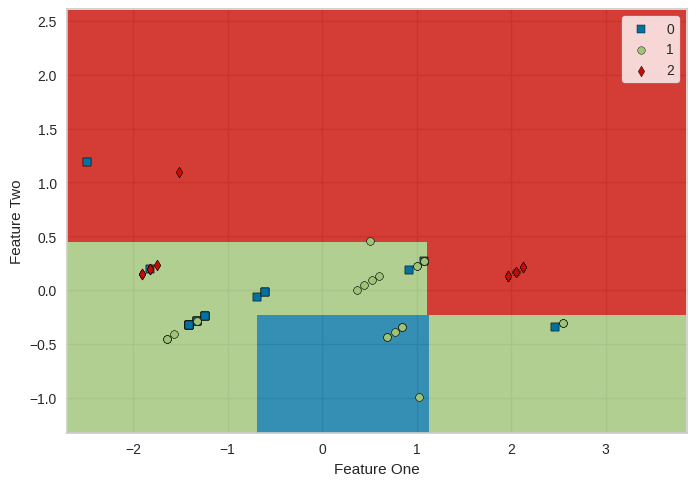

In [ ]:
plot_model(decision_tree_model, plot = 'boundary')

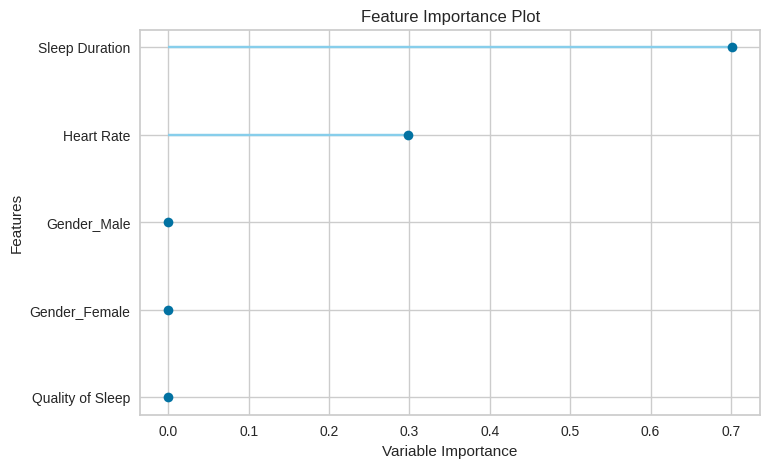

In [ ]:
plot_model(decision_tree_model, plot = 'feature')

In [ ]:
estrutura_DT = export_text(decision_tree_model)
print(estrutura_DT)

|--- feature_0 <= 6.85
|   |--- feature_0 <= 6.25
|   |   |--- feature_2 <= 73.50
|   |   |   |--- class: 1
|   |   |--- feature_2 >  73.50
|   |   |   |--- class: 2
|   |--- feature_0 >  6.25
|   |   |--- feature_2 <= 73.00
|   |   |   |--- class: 0
|   |   |--- feature_2 >  73.00
|   |   |   |--- class: 0
|--- feature_0 >  6.85
|   |--- feature_0 <= 7.95
|   |   |--- feature_2 <= 79.00
|   |   |   |--- class: 1
|   |   |--- feature_2 >  79.00
|   |   |   |--- class: 0
|   |--- feature_0 >  7.95
|   |   |--- feature_2 <= 66.50
|   |   |   |--- class: 1
|   |   |--- feature_2 >  66.50
|   |   |   |--- class: 2



In [ ]:
dt_testing_pred = predict_model(decision_tree_model, data=teste_df)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,0.8857,0.9326,0.8857,0.8854,0.8853,0.8275,0.8277


In [ ]:
true_labels = dt_testing_pred['Sleep Disorder']
predicted_labels = dt_testing_pred['prediction_label'] # Changed 'Label' to 'prediction_label'

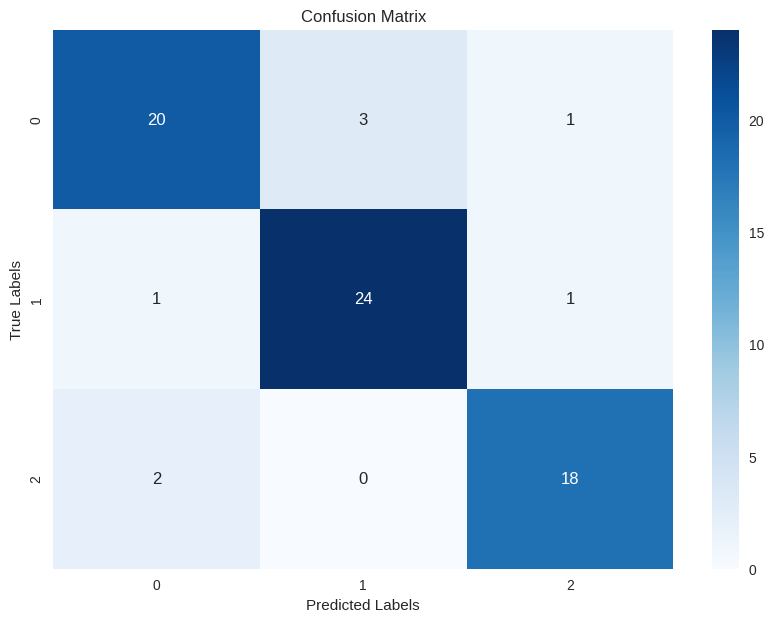

Accuracy: 0.8857142857142857
Kappa: 0.8274799753542822
Classification Report:
              precision    recall  f1-score   support

    Insomnia       0.87      0.83      0.85        24
      Nenhum       0.89      0.92      0.91        26
 Sleep Apnea       0.90      0.90      0.90        20

    accuracy                           0.89        70
   macro avg       0.89      0.89      0.89        70
weighted avg       0.89      0.89      0.89        70



In [ ]:
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Plotar a matriz de confusão
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Calcular acurácia
accuracy = accuracy_score(true_labels, predicted_labels)

# Calcular coeficiente Kappa
kappa = cohen_kappa_score(true_labels, predicted_labels)

# Gerar relatório de classificação
classification_rep = classification_report(true_labels, predicted_labels)

# Exibir as métricas
print(f'Accuracy: {accuracy}')
print(f'Kappa: {kappa}')
print('Classification Report:')
print(classification_rep)

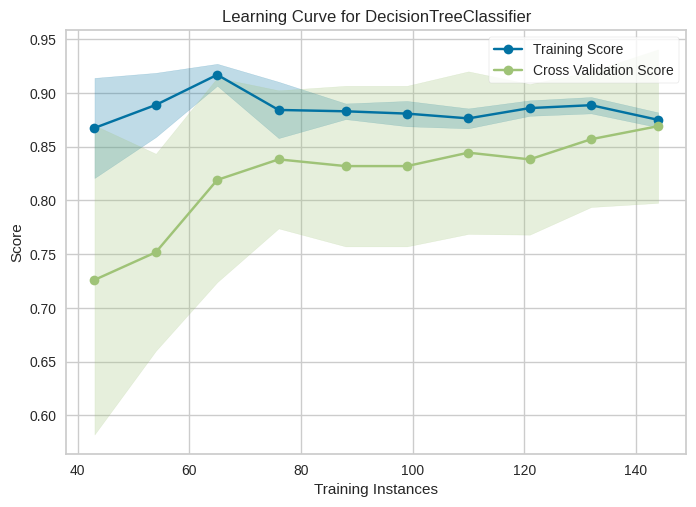

In [ ]:
plot_model(decision_tree_model, plot = 'learning')

[Text(0.5, 0.875, 'x[0] <= 6.85\ngini = 0.666\nsamples = 161\nvalue = [53, 51, 57]'),
 Text(0.25, 0.625, 'x[0] <= 6.25\ngini = 0.568\nsamples = 88\nvalue = [48, 9, 31]'),
 Text(0.125, 0.375, 'x[2] <= 73.5\ngini = 0.405\nsamples = 35\nvalue = [2, 7, 26]'),
 Text(0.0625, 0.125, 'gini = 0.406\nsamples = 8\nvalue = [1, 6, 1]'),
 Text(0.1875, 0.125, 'gini = 0.14\nsamples = 27\nvalue = [1, 1, 25]'),
 Text(0.375, 0.375, 'x[2] <= 73.0\ngini = 0.236\nsamples = 53\nvalue = [46, 2, 5]'),
 Text(0.3125, 0.125, 'gini = 0.129\nsamples = 44\nvalue = [41, 2, 1]'),
 Text(0.4375, 0.125, 'gini = 0.494\nsamples = 9\nvalue = [5, 0, 4]'),
 Text(0.75, 0.625, 'x[0] <= 7.95\ngini = 0.537\nsamples = 73\nvalue = [5, 42, 26]'),
 Text(0.625, 0.375, 'x[2] <= 79.0\ngini = 0.377\nsamples = 44\nvalue = [5, 34, 5]'),
 Text(0.5625, 0.125, 'gini = 0.297\nsamples = 41\nvalue = [3, 34, 4]'),
 Text(0.6875, 0.125, 'gini = 0.444\nsamples = 3\nvalue = [2, 0, 1]'),
 Text(0.875, 0.375, 'x[2] <= 66.5\ngini = 0.4\nsamples = 29\nval

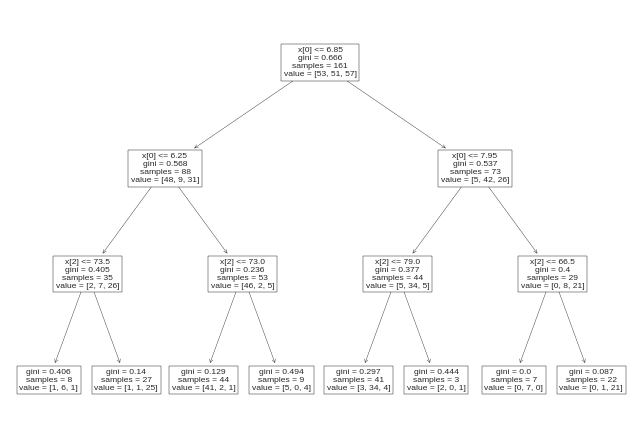

In [ ]:
plot_tree(decision_tree_model)

### K-fold

In [ ]:
clf0 = setup(data = treino_df, target = 'Sleep Disorder', session_id = 12345)

,Description,Value
0,Session id,12345
1,Target,Sleep Disorder
2,Target type,Multiclass
3,Target mapping,"Insomnia: 0, Nenhum: 1, Sleep Apnea: 2"
4,Original data shape,"(161, 6)"
5,Transformed data shape,"(161, 6)"
6,Transformed train set shape,"(112, 6)"
7,Transformed test set shape,"(49, 6)"
8,Numeric features,3
9,Preprocess,True


In [ ]:
decision_tree_model1 = create_model('dt', max_depth = 3, fold = 5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8261,0.8590,0.8261,0.8267,0.8190,0.7394,0.7457
1,0.7826,0.8766,0.7826,0.7803,0.7752,0.6724,0.6782
2,0.8182,0.8574,0.8182,0.8485,0.8231,0.7284,0.7375
3,0.7727,0.8681,0.7727,0.7760,0.7661,0.6573,0.6636
4,0.8636,0.9244,0.8636,0.8838,0.8617,0.7950,0.8051
Mean,0.8126,0.8771,0.8126,0.8231,0.8090,0.7185,0.7260
Std,0.0326,0.0246,0.0326,0.0410,0.0348,0.0495,0.0509


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

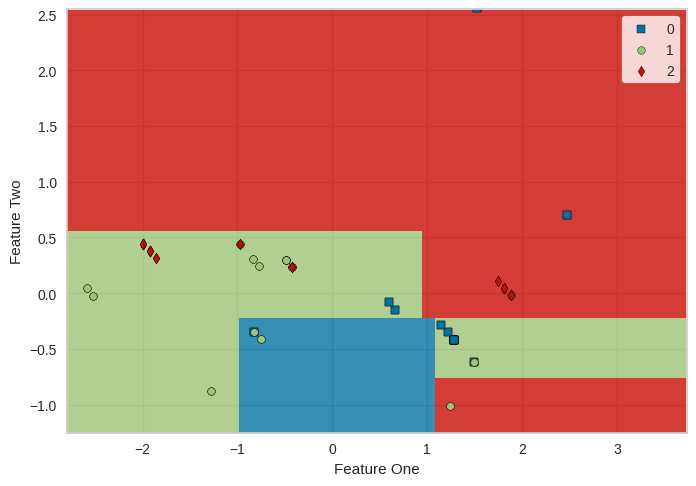

In [ ]:
plot_model(decision_tree_model1, plot = 'boundary')

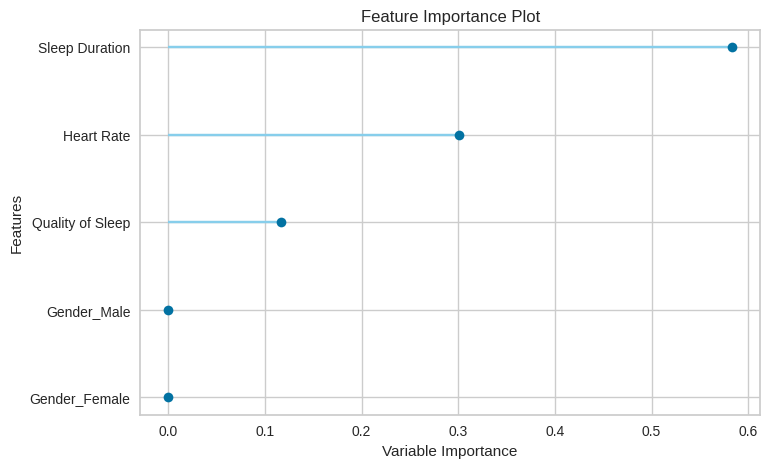

In [ ]:
plot_model(decision_tree_model1, plot = 'feature')

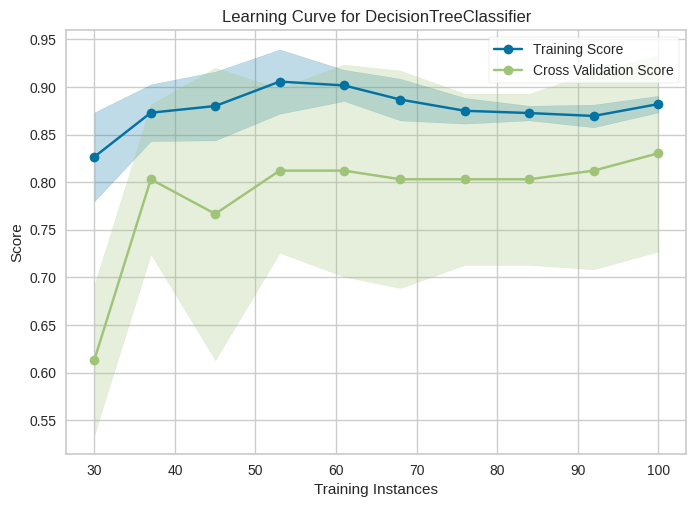

In [ ]:
plot_model(decision_tree_model1, plot = 'learning')

[Text(0.5, 0.875, 'x[0] <= 6.85\ngini = 0.666\nsamples = 112\nvalue = [37, 35, 40]'),
 Text(0.25, 0.625, 'x[0] <= 6.25\ngini = 0.57\nsamples = 65\nvalue = [34, 6, 25]'),
 Text(0.125, 0.375, 'x[2] <= 73.5\ngini = 0.333\nsamples = 25\nvalue = [1, 4, 20]'),
 Text(0.0625, 0.125, 'gini = 0.32\nsamples = 5\nvalue = [0, 4, 1]'),
 Text(0.1875, 0.125, 'gini = 0.095\nsamples = 20\nvalue = [1, 0, 19]'),
 Text(0.375, 0.375, 'x[2] <= 73.0\ngini = 0.301\nsamples = 40\nvalue = [33, 2, 5]'),
 Text(0.3125, 0.125, 'gini = 0.174\nsamples = 32\nvalue = [29, 2, 1]'),
 Text(0.4375, 0.125, 'gini = 0.5\nsamples = 8\nvalue = [4, 0, 4]'),
 Text(0.75, 0.625, 'x[1] <= 8.5\ngini = 0.513\nsamples = 47\nvalue = [3.0, 29.0, 15.0]'),
 Text(0.625, 0.375, 'x[2] <= 79.0\ngini = 0.35\nsamples = 29\nvalue = [3, 23, 3]'),
 Text(0.5625, 0.125, 'gini = 0.263\nsamples = 27\nvalue = [2, 23, 2]'),
 Text(0.6875, 0.125, 'gini = 0.5\nsamples = 2\nvalue = [1, 0, 1]'),
 Text(0.875, 0.375, 'x[2] <= 66.5\ngini = 0.444\nsamples = 18\nva

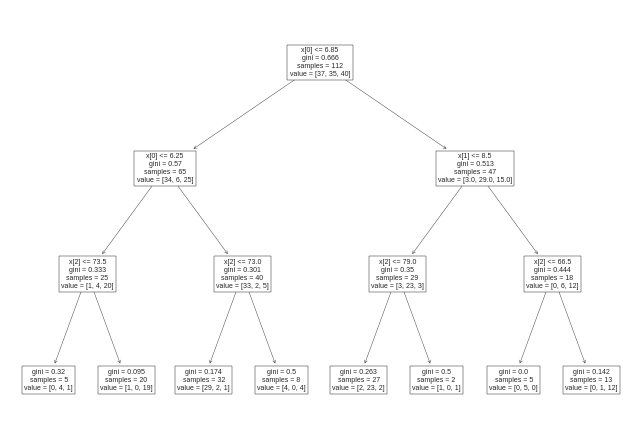

In [ ]:
plot_tree(decision_tree_model1)

In [ ]:
tuned_dt = tune_model(decision_tree_model1)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8333,0.8750,0.8333,0.8500,0.8320,0.7500,0.7579
1,0.9167,0.9323,0.9167,0.9333,0.9153,0.8750,0.8843
2,0.9091,0.9156,0.9091,0.9273,0.9076,0.8625,0.8735
3,0.8182,0.8409,0.8182,0.8591,0.7994,0.7284,0.7567
4,0.7273,0.7492,0.7273,0.7727,0.7403,0.5926,0.6000
5,0.9091,0.9026,0.9091,0.9273,0.9076,0.8625,0.8735
6,0.9091,0.9351,0.9091,0.9318,0.9091,0.8642,0.8750
7,0.9091,0.9164,0.9091,0.9273,0.9051,0.8608,0.8721
8,0.7273,0.8052,0.7273,0.8636,0.7359,0.6024,0.6588


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


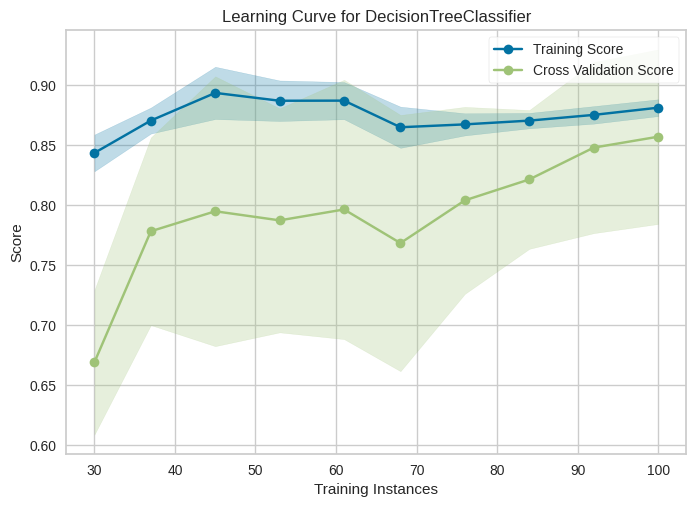

In [ ]:
plot_model(tuned_dt, plot = 'learning')

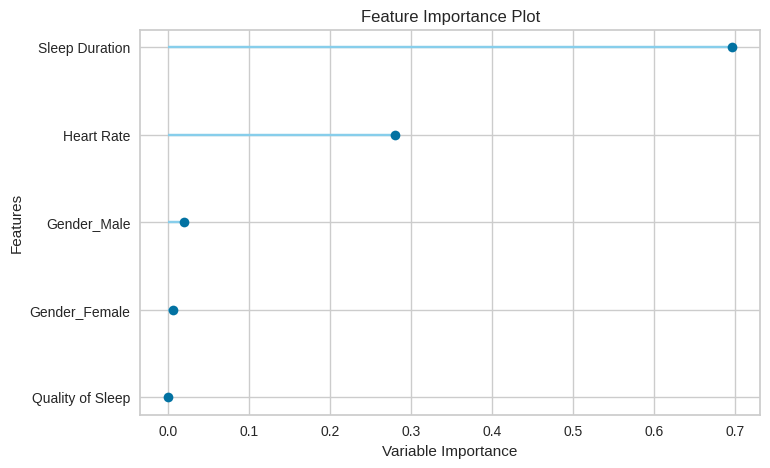

In [ ]:
plot_model(tuned_dt, plot = 'feature')

[Text(0.532608695652174, 0.9166666666666666, 'x[0] <= 6.85\ngini = 0.666\nsamples = 112\nvalue = [37, 35, 40]'),
 Text(0.2391304347826087, 0.75, 'x[0] <= 6.25\ngini = 0.57\nsamples = 65\nvalue = [34, 6, 25]'),
 Text(0.08695652173913043, 0.5833333333333334, 'x[2] <= 73.5\ngini = 0.333\nsamples = 25\nvalue = [1, 4, 20]'),
 Text(0.043478260869565216, 0.4166666666666667, 'gini = 0.32\nsamples = 5\nvalue = [0, 4, 1]'),
 Text(0.13043478260869565, 0.4166666666666667, 'x[2] <= 78.0\ngini = 0.095\nsamples = 20\nvalue = [1, 0, 19]'),
 Text(0.08695652173913043, 0.25, 'gini = 0.0\nsamples = 16\nvalue = [0, 0, 16]'),
 Text(0.17391304347826086, 0.25, 'gini = 0.375\nsamples = 4\nvalue = [1, 0, 3]'),
 Text(0.391304347826087, 0.5833333333333334, 'x[2] <= 73.0\ngini = 0.301\nsamples = 40\nvalue = [33, 2, 5]'),
 Text(0.30434782608695654, 0.4166666666666667, 'x[0] <= 6.55\ngini = 0.174\nsamples = 32\nvalue = [29, 2, 1]'),
 Text(0.2608695652173913, 0.25, 'gini = 0.117\nsamples = 16\nvalue = [15, 0, 1]'),
 

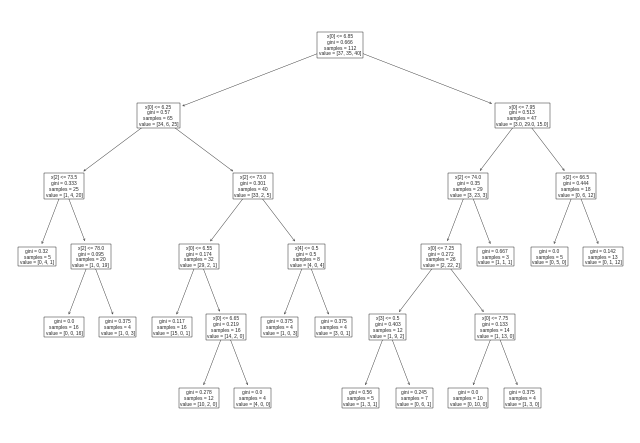

In [ ]:
plot_tree(tuned_dt)

In [ ]:
dt_testing_pred0 = predict_model(tuned_dt, data=teste_df)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,0.9000,0.9337,0.9000,0.9004,0.8993,0.8492,0.8500


In [ ]:
true_labels0 = dt_testing_pred0['Sleep Disorder']
predicted_labels0 = dt_testing_pred0['prediction_label']

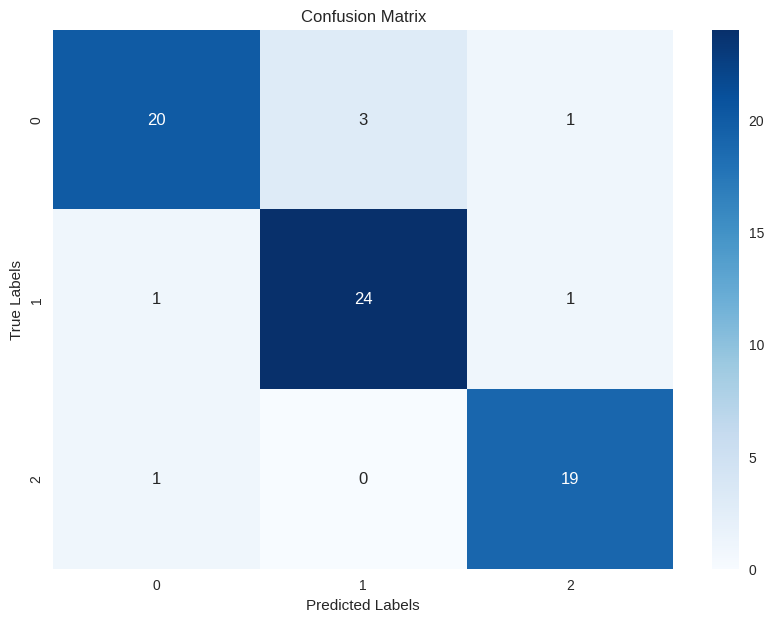

Accuracy: 0.9
Kappa: 0.8492307692307692
Classification Report:
              precision    recall  f1-score   support

    Insomnia       0.91      0.83      0.87        24
      Nenhum       0.89      0.92      0.91        26
 Sleep Apnea       0.90      0.95      0.93        20

    accuracy                           0.90        70
   macro avg       0.90      0.90      0.90        70
weighted avg       0.90      0.90      0.90        70



In [ ]:
conf_matrix = confusion_matrix(true_labels0, predicted_labels0)

# Plotar a matriz de confusão
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Calcular acurácia
accuracy = accuracy_score(true_labels0, predicted_labels0)

# Calcular coeficiente Kappa
kappa = cohen_kappa_score(true_labels0, predicted_labels0)

# Gerar relatório de classificação
classification_rep = classification_report(true_labels0, predicted_labels0)

# Exibir as métricas
print(f'Accuracy: {accuracy}')
print(f'Kappa: {kappa}')
print('Classification Report:')
print(classification_rep)

In [ ]:
# Descobrindo as variáveis na matriz de confusão

print(pd.DataFrame(cdt.get_config('y_train')).value_counts())

Sleep Disorder
Sleep Apnea       57
Insomnia          53
Nenhum            51
Name: count, dtype: int64


0 - Sleep Apnea;
1 - Insomnia;
2 - Nenhum (Healthy).

#K-nn

Link da base de dados: https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset

In [ ]:
df1=pd.read_csv("/content/Sleep_health_and_lifestyle_dataset.csv")

In [ ]:
df1

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [ ]:
df1= df1.drop(columns=['Person ID'])
df1= df1.drop(columns=['Occupation'])
df1= df1.drop(columns=['Gender'])
df1= df1.drop(columns=['Blood Pressure'])
df1= df1.drop(columns=['BMI Category'])
df1= df1.drop(columns=['Daily Steps'])
df1= df1.drop(columns=['Age'])
df1= df1.drop(columns=['Heart Rate'])


In [ ]:
df1['Sleep Disorder'] = df1['Sleep Disorder'].fillna('Nenhum')
min_tamanho = df1['Sleep Disorder'].value_counts().min()
df_balanceado1 = df1.groupby('Sleep Disorder').sample(n=min_tamanho, random_state=42)
df1= df_balanceado1

In [ ]:
df1

,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Sleep Disorder
67,6.0,6,30,8,Insomnia
227,6.3,6,45,7,Insomnia
177,6.5,6,45,7,Insomnia
5,5.9,4,30,8,Insomnia
237,6.5,7,45,4,Insomnia
...,...,...,...,...,...
344,8.2,9,75,3,Sleep Apnea
290,6.0,6,90,8,Sleep Apnea
282,6.0,6,90,8,Sleep Apnea
271,6.1,6,90,8,Sleep Apnea


In [ ]:
seed=2013
treino_df1,teste_df1= train_test_split(df1,test_size=0.3,random_state=seed)

In [ ]:
clf1 = setup(data=df1, target='Sleep Disorder', session_id=321)

,Description,Value
0,Session id,321
1,Target,Sleep Disorder
2,Target type,Multiclass
3,Target mapping,"Insomnia: 0, Nenhum: 1, Sleep Apnea: 2"
4,Original data shape,"(231, 5)"
5,Transformed data shape,"(231, 5)"
6,Transformed train set shape,"(161, 5)"
7,Transformed test set shape,"(70, 5)"
8,Numeric features,4
9,Preprocess,True


In [ ]:
knn_model=create_model('knn',n_neighbors=5,fold=10)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9412,0.9525,0.9412,0.9496,0.9402,0.9110,0.9158
1,0.6875,0.7352,0.6875,0.7578,0.6690,0.5294,0.5599
2,0.9375,0.9818,0.9375,0.9479,0.9375,0.9064,0.9118
3,0.9375,0.9429,0.9375,0.9479,0.9375,0.9064,0.9118
4,0.8750,0.8864,0.8750,0.8750,0.8750,0.8118,0.8118
5,0.7500,0.8884,0.7500,0.8203,0.7315,0.6235,0.6594
6,0.7500,0.8295,0.7500,0.7583,0.7500,0.6257,0.6294
7,0.8750,0.9759,0.8750,0.9062,0.8770,0.8095,0.8246
8,0.6875,0.8753,0.6875,0.6927,0.6741,0.5238,0.5369


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

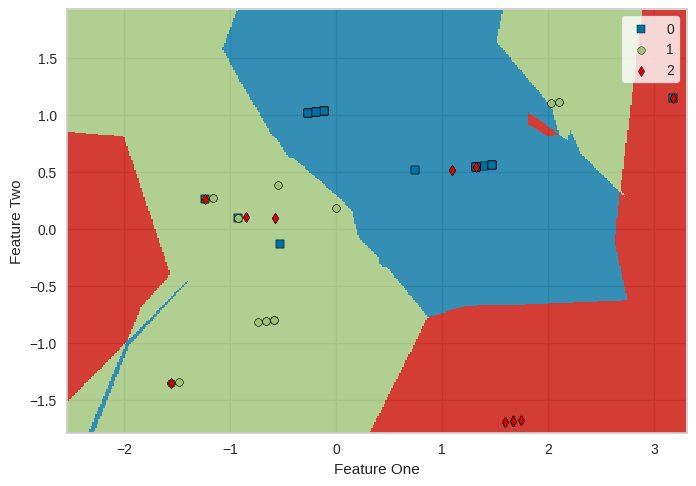

In [ ]:
plot_model(knn_model,plot='boundary')

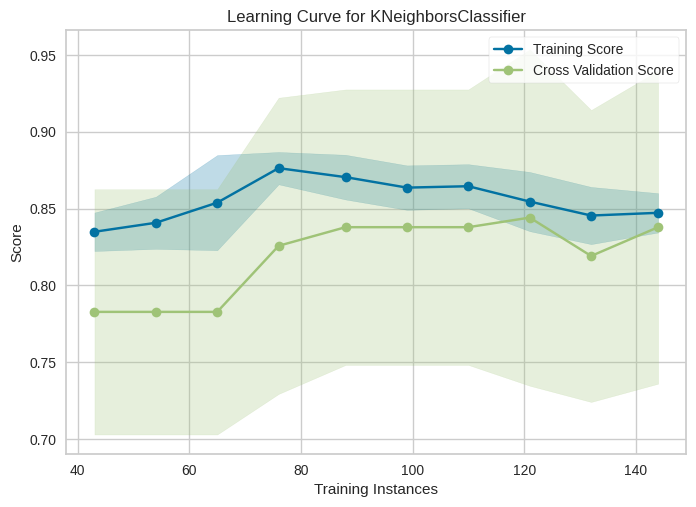

In [ ]:
plot_model(knn_model,plot='learning')

In [ ]:
tunned_knn = tune_model(knn_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9412,0.9552,0.9412,0.9496,0.9402,0.9110,0.9158
1,0.6875,0.7023,0.6875,0.7578,0.6690,0.5294,0.5599
2,0.8750,0.9375,0.8750,0.9062,0.8770,0.8095,0.8246
3,0.8750,0.9517,0.8750,0.8854,0.8750,0.8129,0.8176
4,0.8750,0.8949,0.8750,0.8750,0.8750,0.8118,0.8118
5,0.7500,0.7972,0.7500,0.7576,0.7415,0.6257,0.6369
6,0.7500,0.9159,0.7500,0.7552,0.7481,0.6235,0.6272
7,0.9375,0.9875,0.9375,0.9464,0.9364,0.9053,0.9108
8,0.8125,0.9102,0.8125,0.8125,0.8125,0.7176,0.7176


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


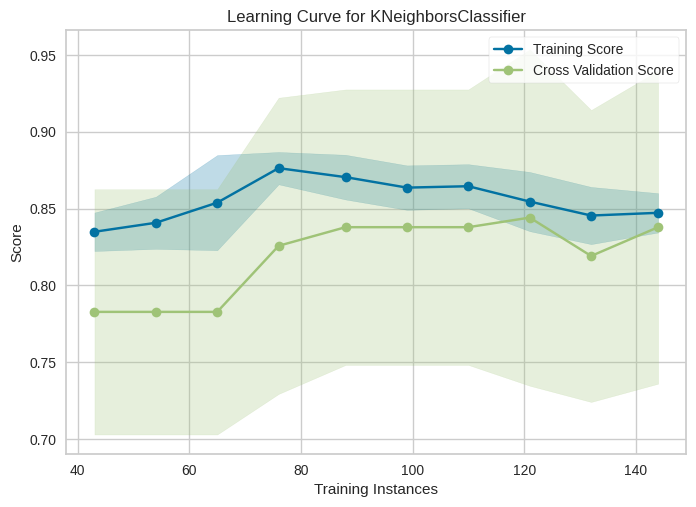

In [ ]:
plot_model(tunned_knn ,plot='learning')

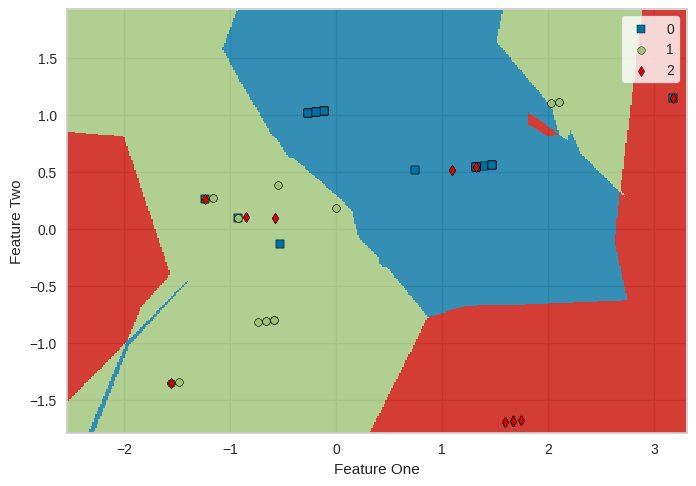

In [ ]:
plot_model(tunned_knn ,plot='boundary')

In [ ]:
dt_testing_prod=predict_model(knn_model,data=teste_df1)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,K Neighbors Classifier,0.8571,0.9487,0.8571,0.8580,0.8565,0.7837,0.7847


Accuracy: 0.8571428571428571
Kappa: 0.7836835599505563
Classification Report:
              precision    recall  f1-score   support

    Insomnia       0.83      0.83      0.83        24
      Nenhum       0.86      0.92      0.89        26
 Sleep Apnea       0.89      0.80      0.84        20

    accuracy                           0.86        70
   macro avg       0.86      0.85      0.85        70
weighted avg       0.86      0.86      0.86        70



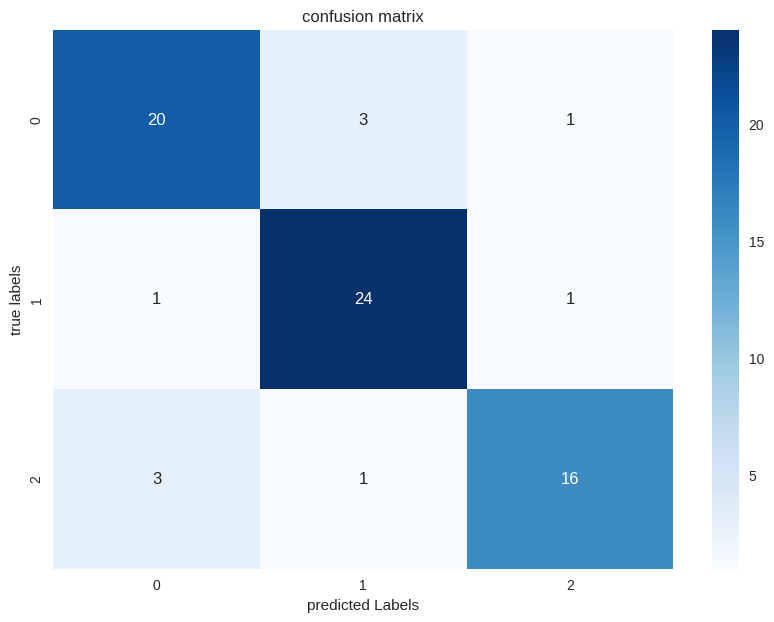

In [ ]:
true_labels=dt_testing_prod['Sleep Disorder']
predicted_labels=dt_testing_prod['prediction_label']
conf_matrix=confusion_matrix(true_labels,predicted_labels)

# Plotar a matriz de confusão
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap='Blues' )
plt.xlabel('predicted Labels')
plt.ylabel('true labels')
plt.title('confusion matrix')

# Calcular a acurácia e o coeficiente kappa
accuracy= accuracy_score(true_labels,predicted_labels)
kappa= cohen_kappa_score(true_labels,predicted_labels)

# Gerar relatório de classificação
classification_rep = classification_report(true_labels, predicted_labels)

# Exibir as métricas
print(f'Accuracy: {accuracy}')
print(f'Kappa: {kappa}')
print('Classification Report:')
print(classification_rep)

In [ ]:
print(clf1.get_config('y_train').unique())

['Insomnia', 'Sleep Apnea', 'Nenhum']
Categories (3, object): ['Insomnia', 'Nenhum', 'Sleep Apnea']


In [ ]:
# Descobrindo as variáveis na matriz de confusão

print(pd.DataFrame(cdt.get_config('y_train')).value_counts())

Sleep Disorder
Sleep Apnea       57
Insomnia          53
Nenhum            51
Name: count, dtype: int64


0 - Sleep Apnea;
1 - Insomnia;
2 - Nenhum (Healthy).